In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from tensorflow.keras.optimizers import SGD

import numpy as np
from numpy import save
from numpy import asarray
from numpy import load

from PIL import Image
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
folder_benign_train = './data/train/benign'
folder_malignant_train = './data/train/malignant'

folder_benign_test = './data/test/benign'
folder_malignant_test = './data/test/malignant'

read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

# Load in training pictures 
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_benign = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')

# Load in testing pictures
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')

# Create labels
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])


# Merge data 
x_train = np.concatenate((X_benign, X_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)

x_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

# Shuffle data
s = np.arange(x_train.shape[0])
np.random.shuffle(s)
x_train = x_train[s]
y_train = y_train[s]

s = np.arange(x_test.shape[0])
np.random.shuffle(s)
x_test = x_test[s]
y_test = y_test[s]

y_trainc = tf.keras.utils.to_categorical(y_train, num_classes= 2)
y_testc = tf.keras.utils.to_categorical(y_test, num_classes= 2)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255
x_test = x_test/255

img_rows, img_cols, channels = 224, 224, 3
num_classes = 2

In [3]:
def create_model():
        model = Sequential()
        model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_rows, img_cols, channels), activation='relu'))
        model.add(Conv2D(32, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))
        model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))
        model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
        model.add(Conv2D(128, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))
        model.add(Flatten())
        model.add(Dense(512, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(num_classes, activation='softmax'))
        sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
        model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
        return model

model = create_model()

In [4]:
model.fit(x_train, y_trainc,
          batch_size=32,
          epochs=50,
          validation_data=(x_test, y_testc))

Train on 2637 samples, validate on 660 samples
Epoch 1/50
2637/2637 [==============================] - 183s 69ms/sample - loss: 0.6867 - accuracy: 0.5385 - val_loss: 0.6762 - val_accuracy: 0.5455
Epoch 2/50
2637/2637 [==============================] - 204s 77ms/sample - loss: 0.6247 - accuracy: 0.6215 - val_loss: 0.5793 - val_accuracy: 0.7742
Epoch 3/50
2637/2637 [==============================] - 228s 86ms/sample - loss: 0.5323 - accuracy: 0.7239 - val_loss: 0.5789 - val_accuracy: 0.7742
Epoch 4/50
2637/2637 [==============================] - 229s 87ms/sample - loss: 0.4963 - accuracy: 0.7569 - val_loss: 0.4621 - val_accuracy: 0.7879
Epoch 5/50
2637/2637 [==============================] - 231s 87ms/sample - loss: 0.4552 - accuracy: 0.7842 - val_loss: 0.4476 - val_accuracy: 0.7500
Epoch 6/50
2637/2637 [==============================] - 231s 88ms/sample - loss: 0.4564 - accuracy: 0.7789 - val_loss: 0.4538 - val_accuracy: 0.7909
Epoch 7/50
2637/2637 [==============================] - 231

In [5]:
m1=tf.keras.models.clone_model(model)
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
m1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
m1.fit(x_train, y_trainc,
          batch_size=32,
          epochs=50,
          validation_data=(x_test, y_testc))
m1.save('final_model_clean.h5')


Train on 2637 samples, validate on 660 samples
Epoch 1/50
2637/2637 [==============================] - 137s 52ms/sample - loss: 0.6916 - accuracy: 0.5423 - val_loss: 0.6881 - val_accuracy: 0.5773
Epoch 2/50
2637/2637 [==============================] - 137s 52ms/sample - loss: 0.6740 - accuracy: 0.5757 - val_loss: 0.6548 - val_accuracy: 0.6333
Epoch 3/50
2637/2637 [==============================] - 137s 52ms/sample - loss: 0.5966 - accuracy: 0.6769 - val_loss: 0.6673 - val_accuracy: 0.5530
Epoch 4/50
2637/2637 [==============================] - 138s 52ms/sample - loss: 0.5288 - accuracy: 0.7410 - val_loss: 0.4921 - val_accuracy: 0.7758
Epoch 5/50
2637/2637 [==============================] - 138s 52ms/sample - loss: 0.5038 - accuracy: 0.7562 - val_loss: 0.4920 - val_accuracy: 0.7879
Epoch 6/50
2637/2637 [==============================] - 138s 52ms/sample - loss: 0.4658 - accuracy: 0.7797 - val_loss: 0.5014 - val_accuracy: 0.7788
Epoch 7/50
2637/2637 [==============================] - 138

In [17]:
loss, acc = m1.evaluate(x_test, y_testc, verbose=0)
print("Base accuracy on regular images:", acc)
print("Base loss on regular images:", loss)

Base accuracy on regular images: 0.830303
Base loss on regular images: 0.34849011500676474


In [7]:
def adversarial_pattern(image, label):
    image = tf.cast(image, tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = tf.keras.losses.categorical_crossentropy(label, prediction)
    
    gradient = tape.gradient(loss, image)
    
    signed_grad = tf.sign(gradient)
    
    return signed_grad

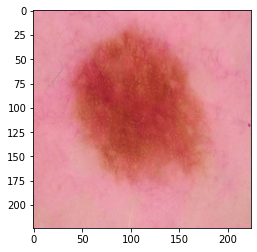

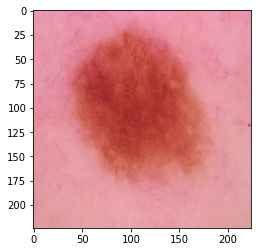

In [8]:
image = x_test[0]
image_label = y_testc[0]
perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), image_label).numpy()
adversarial = image + perturbations * 0.01
plt.imshow(adversarial.reshape((img_rows, img_cols, channels)))
plt.show()
plt.imshow(image.reshape((img_rows, img_cols, channels)))
plt.show()

In [9]:

def generate_adversarials(batch_size):
    while True:
        x = []
        y = []
        for batch in range(batch_size):
            #N = random.randint(0, 100)

            label = y_testc[batch]
            image = x_test[batch]
            
            perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), label).numpy()
            
            
            epsilon = 0.01
            adversarial = image + perturbations * epsilon
            
            x.append(adversarial)
            y.append(y_testc[batch])
        
        
        x = np.asarray(x).reshape((batch_size, img_rows, img_cols, channels))
        y = np.asarray(y)
        
        yield x, y

In [10]:
x_adversarial_test, y_adversarial_test = next(generate_adversarials(660))

In [11]:
loss1, acc1 = model.evaluate(x_test, y_testc, verbose=0)
print("Base accuracy on regular images:", acc1)
print("Base loss on regular images:", loss1)
loss2, acc2 = model.evaluate(x_adversarial_test, y_adversarial_test, verbose=0)
print("Base accuracy on adversarial images:",acc2)
print('Base loss on adversarial images:', loss2)

Base accuracy on regular images: 0.83787876
Base loss on regular images: 0.3422863987359134
Base accuracy on adversarial images: 0.089393936
Base loss on adversarial images: 3.013817716367317


In [12]:
save('adversarial_test_images',x_adversarial_test)
save('adversarial_test_labels',y_adversarial_test)
save('clean_test_images',x_test)
save('clean_test_labels',y_testc)
model.save('final_model_adv.h5')

The actual label for the image is: Benign


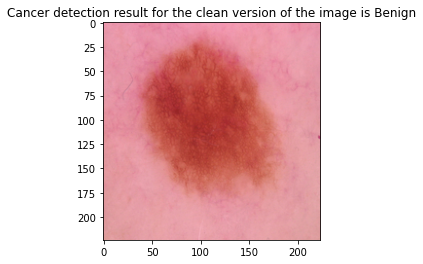

In [13]:
image = x_test[0]
data = image
image_label = model.predict_classes(data.reshape((1, img_rows, img_cols, channels)))
if image_label == 1:
    result = "Malignant"
else:
    result = "Benign"
plt.title("Cancer detection result for the clean version of the image is "+result)
plt.imshow(image.reshape((img_rows, img_cols, channels)))
plt.savefig("clean_image.jpeg",bbox_inches='tight')
label_actual = y_test[0]
if label_actual == 1:
    result_actual = "Malignant"
else:
    result_actual = "Benign"
print("The actual label for the image is:", result_actual)
#print(image_label1)

The actual label for the image is: Benign


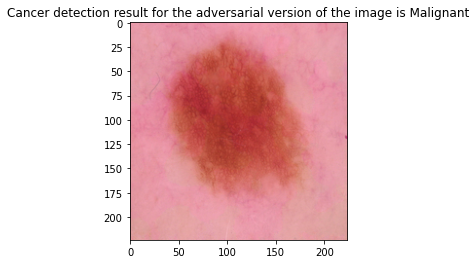

In [14]:
image1 = x_adversarial_test[0]
data1 = image1
image_label1 = model.predict_classes(data1.reshape((1, img_rows, img_cols, channels)))
if image_label1 == 1:
    result1 = "Malignant"
else:
    result1 = "Benign"
plt.title("Cancer detection result for the adversarial version of the image is "+result1)
plt.imshow(image1.reshape((img_rows, img_cols, channels)))
plt.savefig("adv_image.jpeg",bbox_inches='tight')
label_actual1 = y_test[0]
if label_actual1 == 1:
    result_actual1 = "Malignant"
else:
    result_actual1 = "Benign"
print("The actual label for the image is:", result_actual1)
#print(image_label)

In [15]:
# print(y_test.shape)
# print(y_adversarial_test.shape)

In [16]:
save('actual_test_label', y_test)